# Module used in this project

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
import numpy as np

# Dealing with Data 1

## uploading the files

In [ ]:
from google.colab import files
files.upload()

Saving Data1.csv to Data1.csv


{'Data1.csv': b'"","X1","X2","X3","Class"\r\n"1",-0.063274,0.027734,0.022683,1\r\n"2",-0.000731,0.048211,0.069198,1\r\n"3",-0.060767,-0.00908,0.053085,1\r\n"4",0.013252,-0.011876,0.055324,1\r\n"5",-0.054508,-0.003813,0.001738,1\r\n"6",0.02418,0.068275,0.033462,1\r\n"7",-0.029308,0.059849,-0.06326,1\r\n"8",-0.016453,0.013881,-0.013236,1\r\n"9",-0.042361,-0.059942,-0.026487,1\r\n"10",-0.01631,-0.036612,0.047928,1\r\n"11",0.03536,-0.04495,0.041474,1\r\n"12",-0.000287,-0.049496,-0.06343,1\r\n"13",-0.065931,-0.005381,-0.064899,1\r\n"14",0.009049,0.027976,0.01198,1\r\n"15",-0.005335,0.062592,-0.057507,1\r\n"16",-0.004175,0.064646,0.040856,1\r\n"17",0.091024,-0.031446,-0.014774,1\r\n"18",-0.077068,-0.035324,-0.03906,1\r\n"19",0.05515,-0.007045,0.078495,1\r\n"20",-0.033779,0.049066,0.026958,1\r\n"21",0.044954,-0.033716,0.011894,1\r\n"22",0.008785,0.016895,-0.09079,1\r\n"23",-0.061655,-0.023085,0.007996,1\r\n"24",-0.051274,0.054634,0.032257,1\r\n"25",0.04421,-0.062217,-0.018733,1\r\n"26",-0.003

In [ ]:
df_sub1 = pd.read_csv(r'Data1.csv').iloc[:,1:]

## exploring about the data

In [ ]:
df_sub1.shape

(212, 4)

In [ ]:
df_sub1.head(2)

,X1,X2,X3,Class
0,-0.063274,0.027734,0.022683,1
1,-0.000731,0.048211,0.069198,1


In [ ]:
df_sub1['Class'].value_counts()

1    32
2    30
3    30
4    30
5    30
6    30
7    30
Name: Class, dtype: int64

<font color = 'red'>**Important Notes getting from the exploring process**</color>
1. k = 7

## kmeans

In [ ]:
kmeans_model1 = KMeans(n_clusters = 7)

In [ ]:
kmeans_model1.fit(df_sub1.iloc[:,:-1])

KMeans(n_clusters=7)

In [ ]:
df_sub1['kmeans'] = kmeans_model1.labels_

In [ ]:
df_sub1['kmeans'].value_counts()

3    32
0    30
1    30
2    30
6    30
4    30
5    30
Name: kmeans, dtype: int64

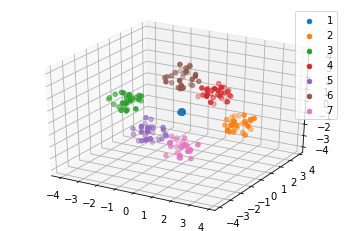

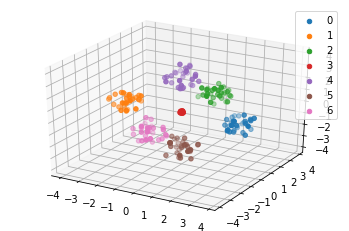

In [ ]:
group_sub1 = df_sub1.groupby(by = 'Class')
group_sub1_kmeans = df_sub1.groupby(by = 'kmeans')

fig = plt.figure()
ax_sub_origin = plt.axes(projection = '3d')
for (ele_id,ele) in group_sub1:
  ax_sub_origin.scatter3D(ele['X1'], ele['X2'],ele['X3'],label = ele_id)
plt.legend()


fig2 = plt.figure()
ax_sub_clustering = plt.axes(projection = '3d')
for (ele_id,ele) in group_sub1_kmeans:
  ax_sub_clustering.scatter(ele['X1'], ele['X2'], ele['X3'],label = ele_id)
plt.legend()

plt.show()

**According to the map we get manually, we can calculate acc and F1 now!**

In [ ]:
mapdict = {0:2,1:3,2:4,3:1,4:6,5:7,6:5}

In [ ]:
df_sub1['kmeans_relabel'] = df_sub1['kmeans'].map(mapdict)

In [ ]:
df_sub1['kmeans_relabel'].value_counts()

1    32
2    30
3    30
4    30
5    30
6    30
7    30
Name: kmeans_relabel, dtype: int64

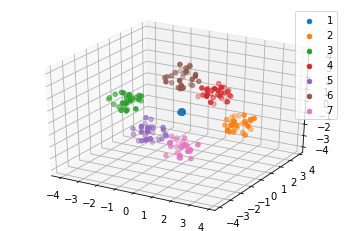

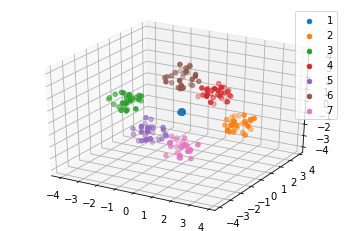

In [ ]:
group_sub1 = df_sub1.groupby(by = 'Class')
group_sub1_kmeans = df_sub1.groupby(by = 'kmeans_relabel')

fig = plt.figure()
ax_sub_origin = plt.axes(projection = '3d')
for (ele_id,ele) in group_sub1:
  ax_sub_origin.scatter3D(ele['X1'], ele['X2'],ele['X3'],label = ele_id)
plt.legend()

fig2 = plt.figure()
ax_sub_clustering = plt.axes(projection = '3d')
for (ele_id,ele) in group_sub1_kmeans:
  ax_sub_clustering.scatter(ele['X1'], ele['X2'], ele['X3'],label = ele_id)
plt.legend()

plt.show()

**metric of dataset1**

In [ ]:
from sklearn import metrics
import numpy as np
y_true1 = np.array(df_sub1['Class'])
y_pred1 = np.array(df_sub1['kmeans_relabel'])
metrics.f1_score(df_sub1['Class'],df_sub1['kmeans_relabel'],average='weighted')

1.0

In [ ]:
metrics.accuracy_score(df_sub1['Class'],df_sub1['kmeans_relabel'])

1.0

## hierarchical

In [ ]:
agglomer = AgglomerativeClustering(n_clusters = 7)
agglomer.fit(df_sub1.iloc[:,:-1])
df_sub1['agglomer'] = kmeans_model1.labels_

NameError: ignored

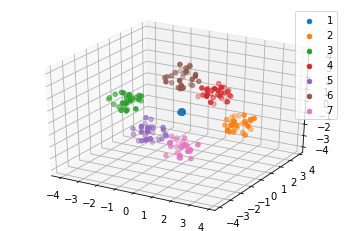

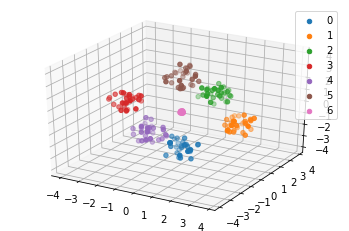

In [ ]:
group_sub1 = df_sub1.groupby(by = 'Class')
group_sub1_agglomer = df_sub1.groupby(by = 'agglomer')

fig = plt.figure()
ax_sub_origin = plt.axes(projection = '3d')
for (ele_id,ele) in group_sub1:
  ax_sub_origin.scatter3D(ele['X1'], ele['X2'],ele['X3'],label = ele_id)
plt.legend()


fig2 = plt.figure()
ax_sub_clustering = plt.axes(projection = '3d')
for (ele_id,ele) in group_sub1_agglomer:
  ax_sub_clustering.scatter(ele['X1'], ele['X2'], ele['X3'],label = ele_id)
plt.legend()

plt.show()

**According to the map we get manually, we can calculate acc and F1 now!**

In [ ]:
mapdict = {0:7,1:2,2:4,3:3,4:5,5:6,6:1}
df_sub1['agglomer_relabel'] = df_sub1['agglomer'].map(mapdict)
df_sub1['agglomer_relabel'].value_counts()

1    32
2    30
3    30
4    30
5    30
6    30
7    30
Name: agglomer_relabel, dtype: int64

In [ ]:
metrics.f1_score(df_sub1['Class'],df_sub1['agglomer_relabel'],average='weighted')

1.0

In [ ]:
metrics.accuracy_score(df_sub1['Class'],df_sub1['agglomer_relabel'])

1.0

# Dealing with Data 2

## uploading the file(s)

In [ ]:
from google.colab import files
files.upload()

Saving Data2.csv to Data2.csv


{'Data2.csv': b'"","X","Y","C","Class"\r\n"X1",3.277701,0.814082,0.326573856831138,1\r\n"X2",0.387577,0.17678,0.888045708864652,1\r\n"X3",0.268546,0.582963,0.0809813803530142,1\r\n"X4",2.031145,0.244597,0.64392063197717,1\r\n"X5",0.188677,0.46128,0.496633379643104,1\r\n"X6",3.525472,0.265579,0.138218731427085,1\r\n"X7",2.229583,0.682189,0.478728676224991,1\r\n"X8",3.392074,0.420976,0.987709329412309,1\r\n"X9",3.589815,0.832527,0.306473263373742,1\r\n"X10",1.227873,0.810909,0.544637870254412,1\r\n"X11",1.300699,0.146538,0.367677544409753,1\r\n"X12",3.596968,0.421791,0.036302286964087,1\r\n"X13",3.106757,0.779664,0.385608246956509,1\r\n"X14",0.221139,0.612603,0.340417316158185,1\r\n"X15",1.496841,0.495985,0.780815254049801,1\r\n"X16",2.860498,0.535719,0.57000310797545,1\r\n"X17",1.45071,0.142352,0.650461491902006,1\r\n"X18",1.745799,0.066373,0.558493249926034,1\r\n"X19",1.4048,0.32968,0.789414771922745,1\r\n"X20",1.7696,0.777809,0.4535391544335,1\r\n"X21",0.464511,0.672442,0.323684085216

In [ ]:
df_sub2 = pd.read_csv(r'Data2.csv').iloc[:,1:]

## exploreing about the data

In [ ]:
df_sub2.shape

(404, 4)

In [ ]:
df_sub2.head(2)

,X,Y,C,Class
0,3.277701,0.814082,0.326574,1
1,0.387577,0.176780,0.888046,1


In [ ]:
df_sub2['Class'].value_counts()

1    200
2    100
3    100
4      4
Name: Class, dtype: int64

## kmeans

<font color = 'red'>**Important Notes getting from the exploring process**</color>
1. k = 4

In [ ]:
kmeans_model2 = KMeans(n_clusters = 4)

In [ ]:
kmeans_model2.fit(df_sub2.iloc[:,:-1])

KMeans(n_clusters=4)

In [ ]:
df_sub2['kmeans'] = kmeans_model2.labels_

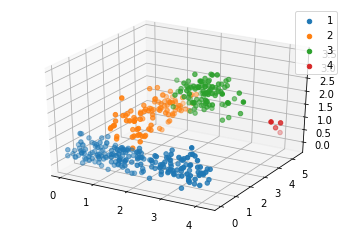

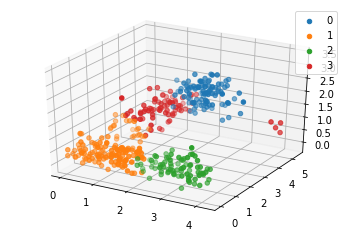

In [ ]:
group_sub2 = df_sub2.groupby(by = 'Class')
group_sub2_kmeans = df_sub2.groupby(by = 'kmeans')

fig = plt.figure()
ax_sub_origin = plt.axes(projection = '3d')
for (ele_id,ele) in group_sub2:
  ax_sub_origin.scatter3D(ele['X'], ele['Y'],ele['C'],label = ele_id)
plt.legend()


fig2 = plt.figure()
ax_sub_clustering = plt.axes(projection = '3d')
for (ele_id,ele) in group_sub2_kmeans:
  ax_sub_clustering.scatter(ele['X'], ele['Y'], ele['C'],label = ele_id)
plt.legend()

plt.show()

**According to the map we get manually, the matching relationship is a litter bit complex than question 1!!!!!!!**

In [ ]:
mapdict2 = {0:3,1:1,2:2,3:1}
df_sub2['kmeans_relabel'] = df_sub2['kmeans'].map(mapdict2)

In [ ]:
metrics.f1_score(df_sub2['Class'],df_sub2['kmeans_relabel'],average='weighted')

0.5226829096211284

In [ ]:
metrics.accuracy_score(df_sub2['Class'],df_sub2['kmeans_relabel'])

0.5371287128712872

## agglomer

In [ ]:
agglomer_model2 = AgglomerativeClustering(n_clusters = 4)
agglomer_model2.fit(df_sub2.iloc[:,:-1])
df_sub2['agglomer'] = agglomer_model2.labels_

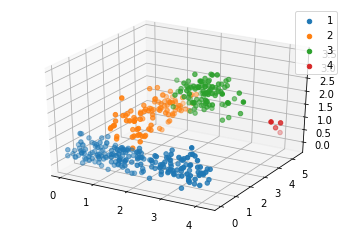

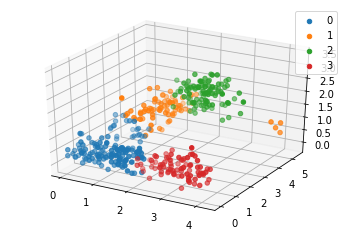

In [ ]:
group_sub2 = df_sub2.groupby(by = 'Class')
group_sub2_agglomer = df_sub2.groupby(by = 'agglomer')

fig = plt.figure()
ax_sub_origin = plt.axes(projection = '3d')
for (ele_id,ele) in group_sub2:
  ax_sub_origin.scatter3D(ele['X'], ele['Y'],ele['C'],label = ele_id)
plt.legend()


fig2 = plt.figure()
ax_sub_clustering = plt.axes(projection = '3d')
for (ele_id,ele) in group_sub2_agglomer:
  ax_sub_clustering.scatter(ele['X'], ele['Y'], ele['C'],label = ele_id)
plt.legend()

plt.show()

**According to the map we get manually, the matching relationship is a litter bit complex than question 1!!!!!!!**

In [ ]:
mapdict2 = {0:1,1:2,2:3,3:1}
df_sub2['agglomer_relabel'] = df_sub2['agglomer'].map(mapdict2)

In [ ]:
metrics.f1_score(df_sub2['Class'],df_sub2['agglomer_relabel'],average = 'weighted')

0.9235734894244142

In [ ]:
metrics.accuracy_score(df_sub2['Class'],df_sub2['agglomer_relabel'])

0.9306930693069307

**The final version plot**

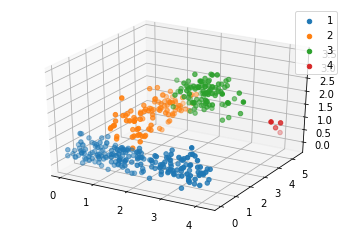

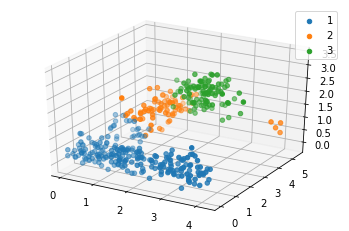

In [ ]:
group_sub2 = df_sub2.groupby(by = 'Class')
group_sub2_agglomer = df_sub2.groupby(by = 'agglomer_relabel')

fig = plt.figure()
ax_sub_origin = plt.axes(projection = '3d')
for (ele_id,ele) in group_sub2:
  ax_sub_origin.scatter3D(ele['X'], ele['Y'],ele['C'],label = ele_id)
plt.legend()


fig2 = plt.figure()
ax_sub_clustering = plt.axes(projection = '3d')
for (ele_id,ele) in group_sub2_agglomer:
  ax_sub_clustering.scatter(ele['X'], ele['Y'], ele['C'],label = ele_id)
plt.legend()

plt.show()

# Dealing with Data 3

## uploading the file(s)

In [ ]:
from google.colab import files
files.upload()
df_sub3 = pd.read_csv(r'Data3.csv').iloc[:,1:]

Saving Data3.csv to Data3.csv


## exploreing about the data

In [ ]:
df_sub3.shape

(400, 4)

In [ ]:
df_sub3.head(2)

,X1,X2,X3,Class
0,1.295428,0.050829,-0.385217,1
1,1.409178,-0.035191,-0.251980,1


In [ ]:
df_sub3['Class'].value_counts()

1    100
2    100
3    100
4    100
Name: Class, dtype: int64

<font color = 'red'>**Important Notes getting from the exploring process**</color>
1. k = 4

In [ ]:
kmeans_model3 = KMeans(n_clusters = 4,random_state = 70138750)
kmeans_model3.fit(df_sub3.iloc[:,:-1])
df_sub3['kmeans'] = kmeans_model3.labels_

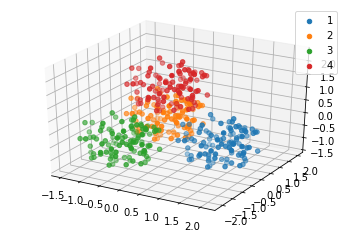

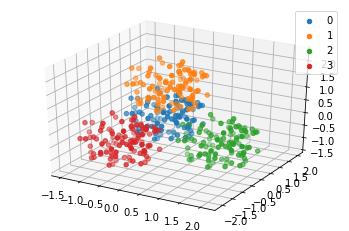

In [ ]:
group_sub3 = df_sub3.groupby(by = 'Class')
group_sub3_kmeans = df_sub3.groupby(by = 'kmeans')

fig = plt.figure()
ax_sub_origin = plt.axes(projection = '3d')
for (ele_id,ele) in group_sub3:
  ax_sub_origin.scatter3D(ele['X1'], ele['X2'],ele['X3'],label = ele_id)
plt.legend()


fig2 = plt.figure()
ax_sub_clustering = plt.axes(projection = '3d')
for (ele_id,ele) in group_sub3_kmeans:
  ax_sub_clustering.scatter(ele['X1'], ele['X2'], ele['X3'],label = ele_id)
plt.legend()

plt.show()

**According to the map we get manually, we can calculate acc and F1 now!**

In [ ]:
mapdict = {0:2,1:4,2:1,3:3}
df_sub3['kmeans_relabel'] = df_sub3['kmeans'].map(mapdict)
df_sub3['kmeans_relabel'].value_counts()

1    100
2    100
3    100
4    100
Name: kmeans_relabel, dtype: int64

In [ ]:
metrics.f1_score(df_sub3['Class'],df_sub3['kmeans_relabel'],average = 'weighted')

1.0

In [ ]:
metrics.accuracy_score(df_sub3['Class'],df_sub3['kmeans_relabel'])

1.0

**final plot**

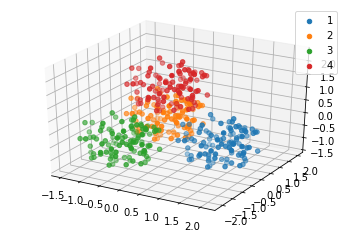

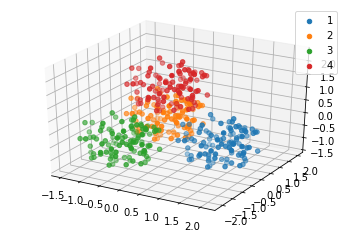

In [ ]:
group_sub3 = df_sub3.groupby(by = 'Class')
group_sub3_kmeans = df_sub3.groupby(by = 'kmeans_relabel')

fig = plt.figure()
ax_sub_origin = plt.axes(projection = '3d')
for (ele_id,ele) in group_sub3:
  ax_sub_origin.scatter3D(ele['X1'], ele['X2'],ele['X3'],label = ele_id)
plt.legend()


fig2 = plt.figure()
ax_sub_clustering = plt.axes(projection = '3d')
for (ele_id,ele) in group_sub3_kmeans:
  ax_sub_clustering.scatter(ele['X1'], ele['X2'], ele['X3'],label = ele_id)
plt.legend()

plt.show()

## hierarchical

In [ ]:
agglomer_model3 = AgglomerativeClustering(n_clusters = 4)
agglomer_model3.fit(df_sub3.iloc[:,:-1])
df_sub3['agglomer'] = agglomer_model3.labels_

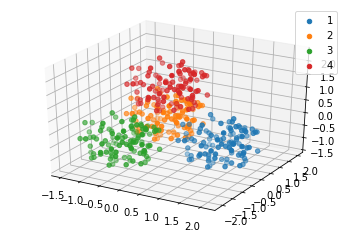

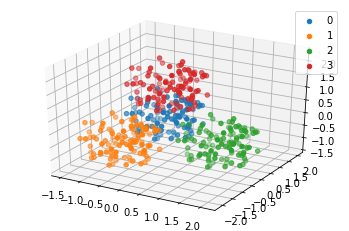

In [ ]:
group_sub3 = df_sub3.groupby(by = 'Class')
group_sub3_agglomer = df_sub3.groupby(by = 'agglomer')

fig = plt.figure()
ax_sub_origin = plt.axes(projection = '3d')
for (ele_id,ele) in group_sub3:
  ax_sub_origin.scatter3D(ele['X1'], ele['X2'],ele['X3'],label = ele_id)
plt.legend()


fig2 = plt.figure()
ax_sub_clustering = plt.axes(projection = '3d')
for (ele_id,ele) in group_sub3_agglomer:
  ax_sub_clustering.scatter(ele['X1'], ele['X2'], ele['X3'],label = ele_id)
plt.legend()

plt.show()

**According to the map we get manually, we can calculate acc and F1 now!**

In [ ]:
mapdict = {0:2,1:3,2:1,3:4}
df_sub3['agglomer_relabel'] = df_sub3['agglomer'].map(mapdict)
df_sub3['agglomer_relabel'].value_counts()

1    100
2    100
3    100
4    100
Name: agglomer_relabel, dtype: int64

In [ ]:
metrics.f1_score(df_sub3['Class'],df_sub3['agglomer_relabel'],average = 'weighted')

1.0

In [ ]:
metrics.accuracy_score(df_sub3['Class'],df_sub3['agglomer_relabel'])

1.0

# Dealing with Data4

## uploading the data

In [ ]:
from google.colab import files
files.upload()
df_sub4 = pd.read_csv(r'Data4.csv').iloc[:,1:]

Saving Data4.csv to Data4 (1).csv


## exploring the data

In [ ]:
df_sub4.shape

(1000, 4)

In [ ]:
df_sub4.head(2)

,X1,X2,X3,Class
0,-0.453,-0.891,0.0230,1
1,0.653,-0.846,0.0211,1


In [ ]:
df_sub4['Class'].value_counts()

1    500
2    500
Name: Class, dtype: int64

<font color = 'red'>**Important Notes getting from the exploring process**</color>
1. k = 2

## kmeans

In [ ]:
kmeans_model4 = KMeans(n_clusters = 2, random_state = 572345723)
kmeans_model4.fit(df_sub4.iloc[:,:-1])
df_sub4['kmeans'] = kmeans_model4.labels_

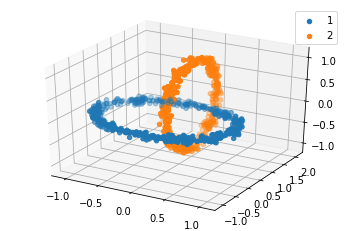

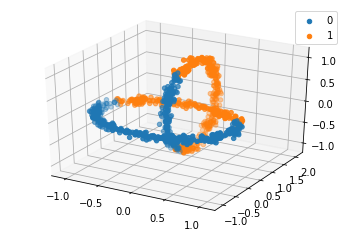

In [ ]:
group_sub4 = df_sub4.groupby(by = 'Class')
group_sub4_kmeans = df_sub4.groupby(by = 'kmeans')

fig = plt.figure()
ax_sub_origin = plt.axes(projection = '3d')
for (ele_id,ele) in group_sub4:
  ax_sub_origin.scatter3D(ele['X1'], ele['X2'],ele['X3'],label = ele_id)
plt.legend()


fig2 = plt.figure()
ax_sub_clustering = plt.axes(projection = '3d')
for (ele_id,ele) in group_sub4_kmeans:
  ax_sub_clustering.scatter(ele['X1'], ele['X2'], ele['X3'],label = ele_id)
plt.legend()

plt.show()

**According to the map we get manually, we can calculate acc and F1 now!**

In [ ]:
mapdict = {0:1,1:2}
df_sub4['kmeans_relabel'] = df_sub4['kmeans'].map(mapdict)
df_sub4['kmeans_relabel'].value_counts()

1    501
2    499
Name: kmeans_relabel, dtype: int64

In [ ]:
metrics.f1_score(df_sub4['Class'],df_sub4['kmeans_relabel'],average = 'weighted')

0.6529996529996529

In [ ]:
metrics.accuracy_score(df_sub4['Class'],df_sub4['kmeans_relabel'])

0.653

**final plot**

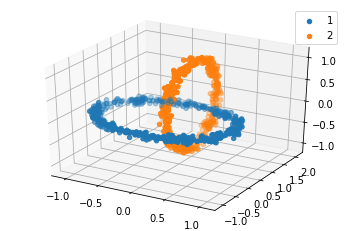

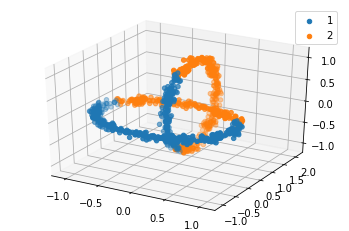

In [ ]:
group_sub4 = df_sub4.groupby(by = 'Class')
group_sub4_kmeans = df_sub4.groupby(by = 'kmeans_relabel')

fig = plt.figure()
ax_sub_origin = plt.axes(projection = '3d')
for (ele_id,ele) in group_sub4:
  ax_sub_origin.scatter3D(ele['X1'], ele['X2'],ele['X3'],label = ele_id)
plt.legend()


fig2 = plt.figure()
ax_sub_clustering = plt.axes(projection = '3d')
for (ele_id,ele) in group_sub4_kmeans:
  ax_sub_clustering.scatter(ele['X1'], ele['X2'], ele['X3'],label = ele_id)
plt.legend()

plt.show()

## hierarchical

In [ ]:
agglomer_model4 = AgglomerativeClustering(n_clusters = 2)
agglomer_model4.fit(df_sub4.iloc[:,:-1])
df_sub4['agglomer'] = agglomer_model4.labels_

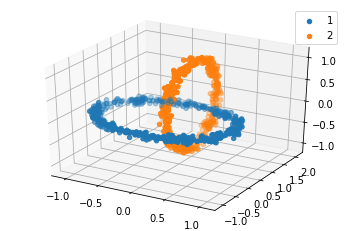

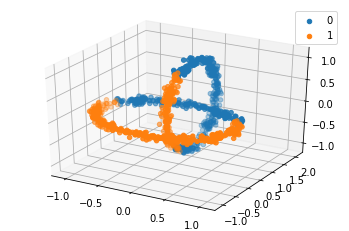

In [ ]:
group_sub4 = df_sub4.groupby(by = 'Class')
group_sub4_agglomer = df_sub4.groupby(by = 'agglomer')

fig = plt.figure()
ax_sub_origin = plt.axes(projection = '3d')
for (ele_id,ele) in group_sub4:
  ax_sub_origin.scatter3D(ele['X1'], ele['X2'],ele['X3'],label = ele_id)
plt.legend()


fig2 = plt.figure()
ax_sub_clustering = plt.axes(projection = '3d')
for (ele_id,ele) in group_sub4_agglomer:
  ax_sub_clustering.scatter(ele['X1'], ele['X2'], ele['X3'],label = ele_id)
plt.legend()

plt.show()

**According to the map we get manually, we can calculate acc and F1 now!**

In [ ]:
mapdict = {1:1,0:2}
df_sub4['agglomer_relabel'] = df_sub4['agglomer'].map(mapdict)
df_sub4['agglomer_relabel'].value_counts()

1    501
2    499
Name: agglomer_relabel, dtype: int64

In [ ]:
metrics.f1_score(df_sub4['Class'],df_sub4['agglomer_relabel'], average = 'weighted')

0.653

In [ ]:
metrics.accuracy_score(df_sub4['Class'],df_sub4['agglomer_relabel'])

0.653

**final plot**

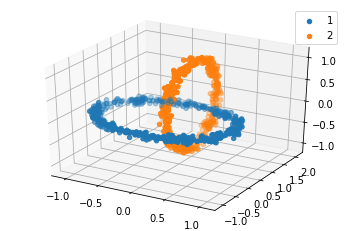

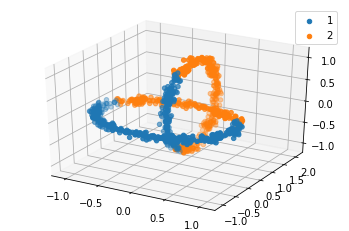

In [ ]:
group_sub4 = df_sub4.groupby(by = 'Class')
group_sub4_agglomer = df_sub4.groupby(by = 'agglomer_relabel')

fig = plt.figure()
ax_sub_origin = plt.axes(projection = '3d')
for (ele_id,ele) in group_sub4:
  ax_sub_origin.scatter3D(ele['X1'], ele['X2'],ele['X3'],label = ele_id)
plt.legend()


fig2 = plt.figure()
ax_sub_clustering = plt.axes(projection = '3d')
for (ele_id,ele) in group_sub4_agglomer:
  ax_sub_clustering.scatter(ele['X1'], ele['X2'], ele['X3'],label = ele_id)
plt.legend()

plt.show()

# Dealing with Data5

## uploading the data

In [ ]:
from google.colab import files
files.upload()

Saving Data5.csv to Data5.csv


{'Data5.csv': b'"","X1","X2","X3","Class"\r\n"1",-4.82249,-50.40217,4.020861,1\r\n"2",-44.46012,20.96467,-11.49206,1\r\n"3",50.00102,0.7807481,9.13446,1\r\n"4",-41.69908,-22.31006,16.31412,1\r\n"5",4.425242,-4.666664,50.22374,1\r\n"6",27.26058,23.38604,35.06772,1\r\n"7",-19.988,-6.638056,45.86818,1\r\n"8",47.5704,-1.571324,15.8721,1\r\n"9",41.8764,10.83021,24.64421,1\r\n"10",15.85935,14.686,44.09609,1\r\n"11",-33.77252,-36.60115,3.766672,1\r\n"12",3.218305,-44.84079,22.52914,1\r\n"13",4.31406,-2.829593,-50.04402,1\r\n"14",22.7331,-33.76487,28.55148,1\r\n"15",5.453126,4.356794,48.95405,1\r\n"16",6.473627,49.40687,0.3539394,1\r\n"17",-21.38691,44.32754,-9.408566,1\r\n"18",34.33926,-11.68791,34.82704,1\r\n"19",-2.538081,-40.3518,29.40645,1\r\n"20",14.16785,-35.62283,-32.61538,1\r\n"21",33.07119,-28.15823,-23.45108,1\r\n"22",-45.86114,2.049557,21.06677,1\r\n"23",-45.06056,16.24832,15.40648,1\r\n"24",11.35568,-8.953778,-49.02086,1\r\n"25",26.94642,-32.28738,25.70605,1\r\n"26",23.97626,43.49

In [ ]:
df_sub5 = pd.read_csv(r'Data5.csv').iloc[:,1:]

## exploring the data

In [ ]:
df_sub5.shape

(800, 4)

In [ ]:
df_sub5.head(2)

,X1,X2,X3,Class
0,-4.82249,-50.40217,4.020861,1
1,-44.46012,20.96467,-11.492060,1


In [ ]:
df_sub5['Class'].value_counts()

1    400
2    400
Name: Class, dtype: int64

<font color = 'red'>**Important Notes getting from the exploring process**</color>
1. k = 2

## kmeans

In [ ]:
kmeans_model5 = KMeans(n_clusters = 2, random_state = 114514)
kmeans_model5.fit(df_sub5.iloc[:,:-1])
df_sub5['kmeans'] = kmeans_model5.labels_

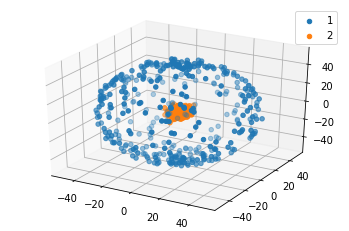

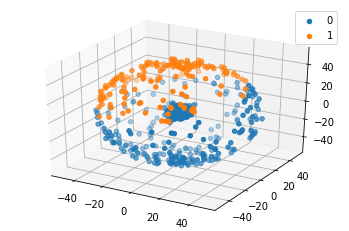

In [ ]:
group_sub5 = df_sub5.groupby(by = 'Class')
group_sub5_kmeans = df_sub5.groupby(by = 'kmeans')

fig = plt.figure()
ax_sub_origin = plt.axes(projection = '3d')
for (ele_id,ele) in group_sub5:
  ax_sub_origin.scatter3D(ele['X1'], ele['X2'],ele['X3'],label = ele_id)
plt.legend()


fig2 = plt.figure()
ax_sub_clustering = plt.axes(projection = '3d')
for (ele_id,ele) in group_sub5_kmeans:
  ax_sub_clustering.scatter(ele['X1'], ele['X2'], ele['X3'],label = ele_id)
plt.legend()

plt.show()

**According to the map we get manually, the matching relationship is a litter bit complex than question 1,3&4!!!!!!!**

In [ ]:
mapdict = {0:2,1:1}
df_sub5['kmeans_relabel'] = df_sub5['kmeans'].map(mapdict)
df_sub5['kmeans_relabel'].value_counts()

2    629
1    171
Name: kmeans_relabel, dtype: int64

In [ ]:
metrics.f1_score(df_sub5['Class'],df_sub5['kmeans_relabel'], average = 'weighted')

0.6882015252936301

In [ ]:
metrics.accuracy_score(df_sub5['Class'],df_sub5['kmeans_relabel'])

0.71375

**final plot**

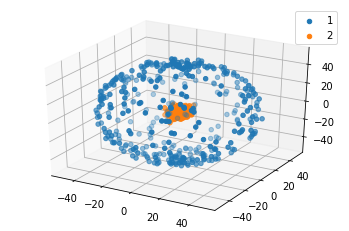

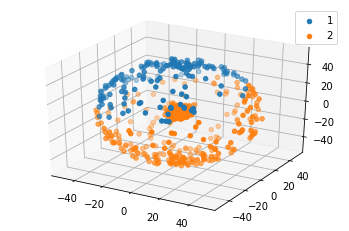

In [ ]:
group_sub5 = df_sub5.groupby(by = 'Class')
group_sub5_kmeans = df_sub5.groupby(by = 'kmeans_relabel')

fig = plt.figure()
ax_sub_origin = plt.axes(projection = '3d')
for (ele_id,ele) in group_sub5:
  ax_sub_origin.scatter3D(ele['X1'], ele['X2'],ele['X3'],label = ele_id)
plt.legend()


fig2 = plt.figure()
ax_sub_clustering = plt.axes(projection = '3d')
for (ele_id,ele) in group_sub5_kmeans:
  ax_sub_clustering.scatter(ele['X1'], ele['X2'], ele['X3'],label = ele_id)
plt.legend()

plt.show()

## hierarchical

In [ ]:
agglomer_model5 = AgglomerativeClustering(n_clusters = 2)
agglomer_model5.fit(df_sub5.iloc[:,:-1])
df_sub5['agglomer'] = agglomer_model5.labels_

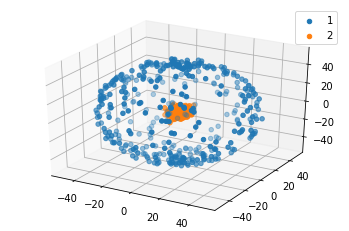

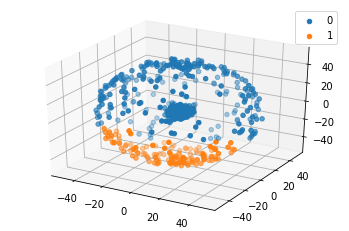

In [ ]:
group_sub5 = df_sub5.groupby(by = 'Class')
group_sub5_agglomer = df_sub5.groupby(by = 'agglomer')

fig = plt.figure()
ax_sub_origin = plt.axes(projection = '3d')
for (ele_id,ele) in group_sub5:
  ax_sub_origin.scatter3D(ele['X1'], ele['X2'],ele['X3'],label = ele_id)
plt.legend()


fig2 = plt.figure()
ax_sub_clustering = plt.axes(projection = '3d')
for (ele_id,ele) in group_sub5_agglomer:
  ax_sub_clustering.scatter(ele['X1'], ele['X2'], ele['X3'],label = ele_id)
plt.legend()

plt.show()

**According to the map we get manually, the matching relationship is a litter bit complex than question 1,3&4!!!!!!!**

In [ ]:
mapdict = {0:2,1:1}
df_sub5['agglomer_relabel'] = df_sub5['agglomer'].map(mapdict)

In [ ]:
metrics.f1_score(df_sub5['Class'],df_sub5['agglomer_relabel'], average = 'weighted')

0.6119832048204714

In [ ]:
metrics.accuracy_score(df_sub5['Class'],df_sub5['agglomer_relabel'])

0.6575

**final plot**

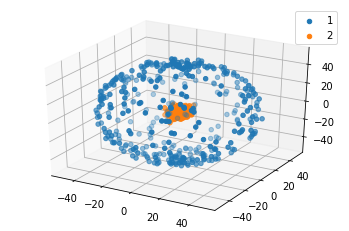

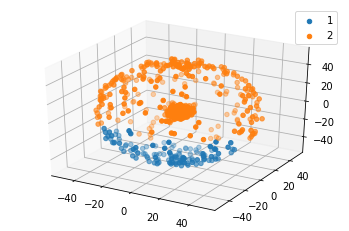

In [ ]:
group_sub5 = df_sub5.groupby(by = 'Class')
group_sub5_agglomer = df_sub5.groupby(by = 'agglomer_relabel')

fig = plt.figure()
ax_sub_origin = plt.axes(projection = '3d')
for (ele_id,ele) in group_sub5:
  ax_sub_origin.scatter3D(ele['X1'], ele['X2'],ele['X3'],label = ele_id)
plt.legend()


fig2 = plt.figure()
ax_sub_clustering = plt.axes(projection = '3d')
for (ele_id,ele) in group_sub5_agglomer:
  ax_sub_clustering.scatter(ele['X1'], ele['X2'], ele['X3'],label = ele_id)
plt.legend()

plt.show()

# Dealing with Data6

## uploading the data

In [ ]:
from google.colab import files
files.upload()
df_sub6 = pd.read_csv(r'Data6.csv').iloc[:,1:]

Saving Data6.csv to Data6 (1).csv


## exploring the data

In [ ]:
df_sub6.shape

(4096, 3)

In [ ]:
df_sub6.head(2)

,X1,X2,Class
0,1.388261,2.076096,1
1,2.177247,3.102304,1


In [ ]:
df_sub6['Class'].value_counts()

1    2048
2    2048
Name: Class, dtype: int64

<font color = 'red'>**Important Notes getting from the exploring process**</color>
1. k = 2

## kmeans

In [ ]:
kmeans_model6 = KMeans(n_clusters = 2, random_state=1314520)
kmeans_model6.fit(df_sub6.iloc[:,:-1])
df_sub6['kmeans'] = kmeans_model6.labels_

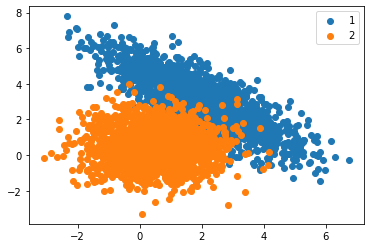

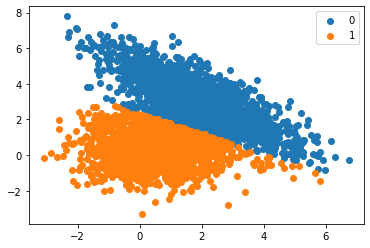

In [ ]:
group_sub6 = df_sub6.groupby(by = 'Class')
group_sub6_kmeans = df_sub6.groupby(by = 'kmeans')

fig = plt.figure()
ax_sub_origin = plt.axes()
for (ele_id,ele) in group_sub6:
  ax_sub_origin.scatter(ele['X1'], ele['X2'], label = ele_id)
plt.legend()

fig2 = plt.figure()
ax_sub_clustering = plt.axes()
for (ele_id,ele) in group_sub6_kmeans:
  ax_sub_clustering.scatter(ele['X1'],ele['X2'], label = ele_id)
plt.legend()

plt.show()

**According to the map we get manually, we can calculate acc and F1 now!**

In [ ]:
mapdict = {0:1,1:2}
df_sub6['kmeans_relabel'] = df_sub6['kmeans'].map(mapdict)

In [ ]:
metrics.f1_score(df_sub6['Class'],df_sub6['kmeans_relabel'], average = 'weighted')

0.9513828386139447

In [ ]:
metrics.accuracy_score(df_sub6['Class'],df_sub6['kmeans_relabel'])

0.951416015625

**final plot**

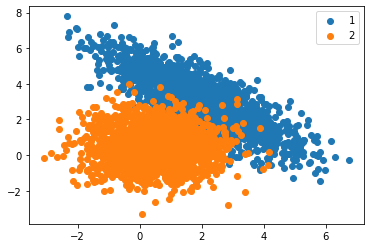

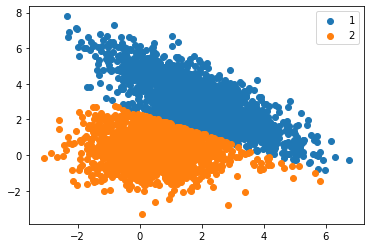

In [ ]:
group_sub6 = df_sub6.groupby(by = 'Class')
group_sub6_kmeans = df_sub6.groupby(by = 'kmeans_relabel')

fig = plt.figure()
ax_sub_origin = plt.axes()
for (ele_id,ele) in group_sub6:
  ax_sub_origin.scatter(ele['X1'], ele['X2'], label = ele_id)
plt.legend()

fig2 = plt.figure()
ax_sub_clustering = plt.axes()
for (ele_id,ele) in group_sub6_kmeans:
  ax_sub_clustering.scatter(ele['X1'],ele['X2'], label = ele_id)
plt.legend()

plt.show()

## hierarchical

In [ ]:
agglomer_model6 = AgglomerativeClustering(n_clusters = 2)
agglomer_model6.fit(df_sub6.iloc[:,:-1])
df_sub6['agglomer'] = agglomer_model6.labels_

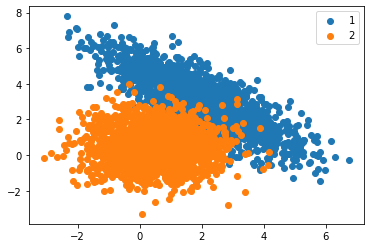

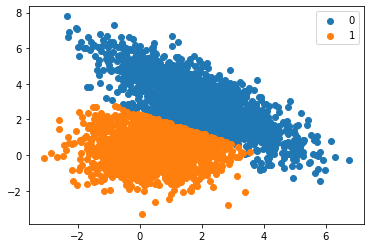

In [ ]:
group_sub6 = df_sub6.groupby(by = 'Class')
group_sub6_agglomer = df_sub6.groupby(by = 'agglomer')

fig = plt.figure()
ax_sub_origin = plt.axes()
for (ele_id,ele) in group_sub6:
  ax_sub_origin.scatter(ele['X1'], ele['X2'], label = ele_id)
plt.legend()

fig2 = plt.figure()
ax_sub_clustering = plt.axes()
for (ele_id,ele) in group_sub6_agglomer:
  ax_sub_clustering.scatter(ele['X1'],ele['X2'], label = ele_id)
plt.legend()

plt.show()

In [ ]:
mapdict = {0:1,1:2}
df_sub6['agglomer_relabel'] = df_sub6['agglomer'].map(mapdict)

In [ ]:
metrics.f1_score(df_sub6['Class'],df_sub6['agglomer_relabel'], average = 'weighted')

0.9547891405873605

In [ ]:
metrics.accuracy_score(df_sub6['Class'],df_sub6['agglomer_relabel'])

0.954833984375

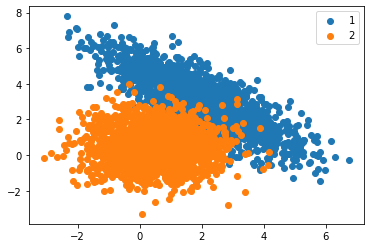

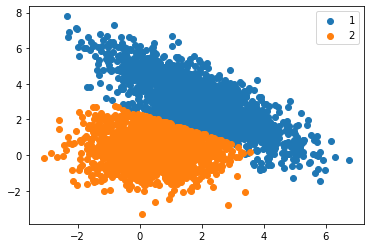

In [ ]:
group_sub6 = df_sub6.groupby(by = 'Class')
group_sub6_agglomer = df_sub6.groupby(by = 'agglomer_relabel')

fig = plt.figure()
ax_sub_origin = plt.axes()
for (ele_id,ele) in group_sub6:
  ax_sub_origin.scatter(ele['X1'], ele['X2'], label = ele_id)
plt.legend()

fig2 = plt.figure()
ax_sub_clustering = plt.axes()
for (ele_id,ele) in group_sub6_agglomer:
  ax_sub_clustering.scatter(ele['X1'],ele['X2'], label = ele_id)
plt.legend()

plt.show()

# Dealing with Data7

## uploading the data

In [ ]:
from google.colab import files
files.upload()
df_sub7 = pd.read_csv(r'Data7.csv').iloc[:,1:]

Saving Data7.csv to Data7.csv


## exploring the data

In [ ]:
df_sub7.shape

(770, 3)

In [ ]:
df_sub7.head(2)

,X1,X2,Class
0,-3.0,-3.0,5
1,-3.0,3.0,4


In [ ]:
df_sub7['Class'].value_counts()

1    395
2    363
5      3
4      3
6      3
3      3
Name: Class, dtype: int64

<font color = 'red'>**Important Notes getting from the exploring process**</color>
1. k = 6

## kmeans

In [ ]:
kmeans_model7 = KMeans(n_clusters = 6, random_state = 20000708)
kmeans_model7.fit(df_sub7.iloc[:,:-1])
df_sub7['kmeans'] = kmeans_model7.labels_

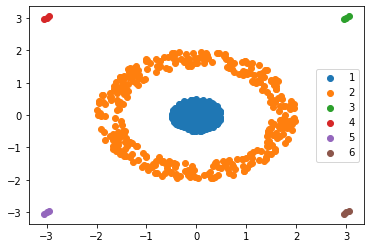

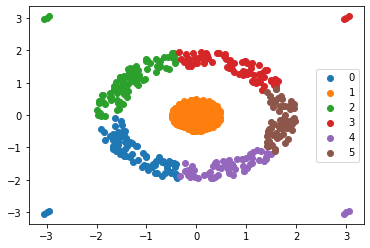

In [ ]:
group_sub7 = df_sub7.groupby(by = 'Class')
group_sub7_kmeans = df_sub7.groupby(by = 'kmeans')

fig = plt.figure()
ax_sub_origin = plt.axes()
for (ele_id,ele) in group_sub7:
  ax_sub_origin.scatter(ele['X1'], ele['X2'], label = ele_id)
plt.legend()

fig2 = plt.figure()
ax_sub_clustering = plt.axes()
for (ele_id,ele) in group_sub7_kmeans:
  ax_sub_clustering.scatter(ele['X1'],ele['X2'], label = ele_id)
plt.legend()

plt.show()

**According to the map we get manually, we can calculate acc and F1 now!**

In [ ]:
mapdict = {0:5,1:1,2:4,3:3,4:6,5:2}
df_sub7['kmeans_relabel'] = df_sub7['kmeans'].map(mapdict)

In [ ]:
metrics.f1_score(df_sub7['Class'],df_sub7['kmeans_relabel'], average = 'weighted')

0.6684442257297747

In [ ]:
metrics.accuracy_score(df_sub7['Class'],df_sub7['kmeans_relabel'])

0.6207792207792208

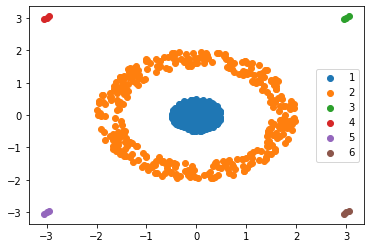

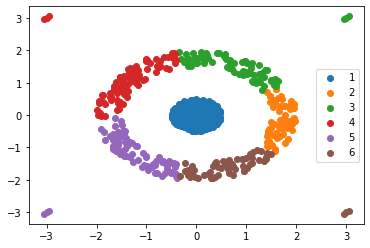

In [ ]:
group_sub7 = df_sub7.groupby(by = 'Class')
group_sub7_kmeans = df_sub7.groupby(by = 'kmeans_relabel')

fig = plt.figure()
ax_sub_origin = plt.axes()
for (ele_id,ele) in group_sub7:
  ax_sub_origin.scatter(ele['X1'], ele['X2'], label = ele_id)
plt.legend()

fig2 = plt.figure()
ax_sub_clustering = plt.axes()
for (ele_id,ele) in group_sub7_kmeans:
  ax_sub_clustering.scatter(ele['X1'],ele['X2'], label = ele_id)
plt.legend()

plt.show()

## agglomer

In [ ]:
agglomer_model7 = AgglomerativeClustering(n_clusters = 6)
agglomer_model7.fit(df_sub7.iloc[:,:-1])
df_sub7['agglomer'] = agglomer_model7.labels_

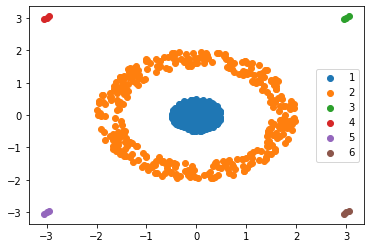

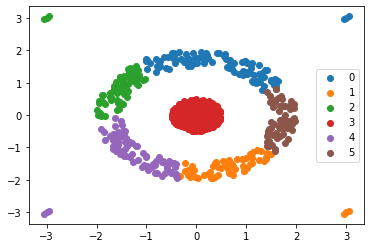

In [ ]:
group_sub7 = df_sub7.groupby(by = 'Class')
group_sub7_agglomer = df_sub7.groupby(by = 'agglomer')

fig = plt.figure()
ax_sub_origin = plt.axes()
for (ele_id,ele) in group_sub7:
  ax_sub_origin.scatter(ele['X1'], ele['X2'], label = ele_id)
plt.legend()

fig2 = plt.figure()
ax_sub_clustering = plt.axes()
for (ele_id,ele) in group_sub7_agglomer:
  ax_sub_clustering.scatter(ele['X1'],ele['X2'], label = ele_id)
plt.legend()

plt.show()

**According to the map we get manually, we can calculate acc and F1 now!**

In [ ]:
mapdict = {0:3,1:6,2:4,3:1,4:5,5:2}
df_sub7['agglomer_relabel'] = df_sub7['agglomer'].map(mapdict)

In [ ]:
metrics.f1_score(df_sub7['Class'],df_sub7['agglomer_relabel'],average = 'weighted')

0.6684650985767345

In [ ]:
metrics.accuracy_score(df_sub7['Class'],df_sub7['agglomer_relabel'])

0.6207792207792208

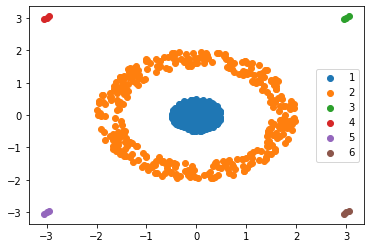

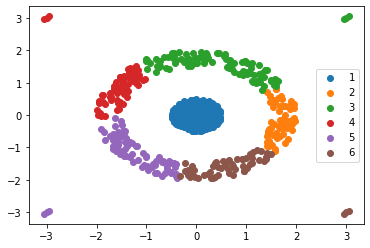

In [ ]:
group_sub7 = df_sub7.groupby(by = 'Class')
group_sub7_agglomer = df_sub7.groupby(by = 'agglomer_relabel')

fig = plt.figure()
ax_sub_origin = plt.axes()
for (ele_id,ele) in group_sub7:
  ax_sub_origin.scatter(ele['X1'], ele['X2'], label = ele_id)
plt.legend()

fig2 = plt.figure()
ax_sub_clustering = plt.axes()
for (ele_id,ele) in group_sub7_agglomer:
  ax_sub_clustering.scatter(ele['X1'],ele['X2'], label = ele_id)
plt.legend()

plt.show()

# Dealing with Data8

In [ ]:
from google.colab import files
files.upload()

Saving Data8.csv to Data8.csv


{'Data8.csv': b'"","X1","X2","X3","Class"\r\n"1",0,0,1,1\r\n"2",0,0.052336,0.99863,1\r\n"3",0.049774,0.016173,0.99863,1\r\n"4",0.030762,-0.042341,0.99863,1\r\n"5",-0.030762,-0.042341,0.99863,1\r\n"6",-0.049774,0.016173,0.99863,1\r\n"7",0,0.104528,0.994522,1\r\n"8",0.06144,0.084565,0.994522,1\r\n"9",0.099412,0.032301,0.994522,1\r\n"10",0.099412,-0.032301,0.994522,1\r\n"11",0.06144,-0.084565,0.994522,1\r\n"12",0,-0.104528,0.994522,1\r\n"13",-0.06144,-0.084565,0.994522,1\r\n"14",-0.099412,-0.032301,0.994522,1\r\n"15",-0.099412,0.032301,0.994522,1\r\n"16",-0.06144,0.084565,0.994522,1\r\n"17",0,0.156434,0.987688,1\r\n"18",0.063628,0.14291,0.987688,1\r\n"19",0.116253,0.104675,0.987688,1\r\n"20",0.148778,0.048341,0.987688,1\r\n"21",0.155578,-0.016352,0.987688,1\r\n"22",0.135476,-0.078217,0.987688,1\r\n"23",0.09195,-0.126558,0.987688,1\r\n"24",0.032525,-0.153016,0.987688,1\r\n"25",-0.032525,-0.153016,0.987688,1\r\n"26",-0.09195,-0.126558,0.987688,1\r\n"27",-0.135476,-0.078217,0.987688,1\r\n"28

In [ ]:
df_sub8 = pd.read_csv(r'Data8.csv').iloc[:,1:]

In [ ]:
df_sub8.shape

(4002, 4)

In [ ]:
df_sub8.head(2)

,X1,X2,X3,Class
0,0.0,0.000000,1.00000,1
1,0.0,0.052336,0.99863,1


In [ ]:
df_sub8['Class'].value_counts()

1    4002
Name: Class, dtype: int64

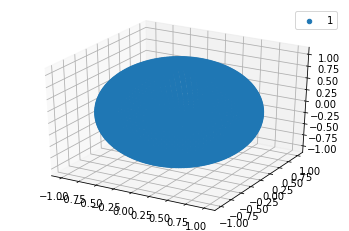

In [ ]:
group_sub8 = df_sub8.groupby(by = 'Class')

fig = plt.figure()
ax_sub_origin = plt.axes(projection = '3d')
for (ele_id,ele) in group_sub8:
  ax_sub_origin.scatter3D(ele['X1'], ele['X2'],ele['X3'],label = ele_id)
plt.legend()

## <font color = 'red'>The accuracy must be less than 100% if using external validation</font>
## It is meaningless to do external validation

In [ ]:
kmeans_model8 = KMeans(n_clusters = 1, random_state = 2170)
kmeans_model8.fit(df_sub8.iloc[:,:-1])
df_sub8['kmeans=1'] = kmeans_model8.labels_

In [ ]:
kmeans_model8 = KMeans(n_clusters = 2, random_state = 21708)
kmeans_model8.fit(df_sub8.iloc[:,:-1])
df_sub8['kmeans=2'] = kmeans_model8.labels_

In [ ]:
kmeans_model8 = KMeans(n_clusters = 2, random_state = 2222)
kmeans_model8.fit(df_sub8.iloc[:,:-1])
df_sub8['kmeans=3'] = kmeans_model8.labels_

In [ ]:
kmeans_model8 = KMeans(n_clusters = 2, random_state = 2999908)
kmeans_model8.fit(df_sub8.iloc[:,:-1])
df_sub8['kmeans=4'] = kmeans_model8.labels_

In [ ]:
kmeans_model8 = KMeans(n_clusters = 2, random_state = 23)
kmeans_model8.fit(df_sub8.iloc[:,:-1])
df_sub8['kmeans=5'] = kmeans_model8.labels_

In [ ]:
kmeans_model8 = KMeans(n_clusters = 2, random_state = 21)
kmeans_model8.fit(df_sub8.iloc[:,:-1])
df_sub8['kmeans=6'] = kmeans_model8.labels_

In [ ]:
agglomer_model8 = AgglomerativeClustering(n_clusters = 44)
agglomer_model8.fit(df_sub8.iloc[:,:-1])
df_sub8['agglomer=2'] = kmeans_model8.labels_

In [ ]:
agglomer_model8 = AgglomerativeClustering(n_clusters = 99)
agglomer_model8.fit(df_sub8.iloc[:,:-1])
df_sub8['agglomer=3'] = kmeans_model8.labels_

In [ ]:
agglomer_model8 = AgglomerativeClustering(n_clusters = 999)
agglomer_model8.fit(df_sub8.iloc[:,:-1])
df_sub8['agglomer=4'] = kmeans_model8.labels_

In [ ]:
agglomer_model8 = AgglomerativeClustering(n_clusters = 333)
agglomer_model8.fit(df_sub8.iloc[:,:-1])
df_sub8['agglomer=5'] = kmeans_model8.labels_

In [ ]:
agglomer_model8 = AgglomerativeClustering(n_clusters = 1111)
agglomer_model8.fit(df_sub8.iloc[:,:-1])
df_sub8['agglomer=6'] = kmeans_model8.labels_

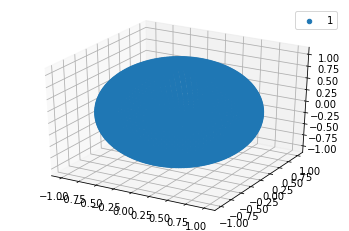

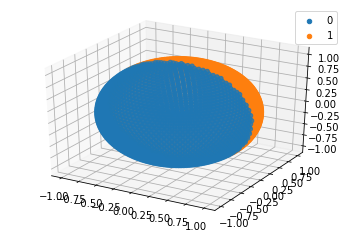

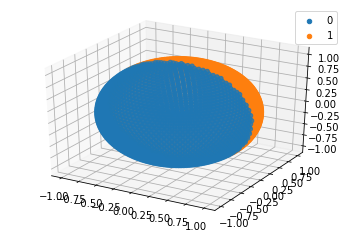

In [ ]:
from matplotlib.figure import projections
group_sub8 = df_sub8.groupby(by = 'Class')
group_sub8_kmeans = df_sub8.groupby(by = 'kmeans=1')
group_sub8_agglomer = df_sub8.groupby(by = 'agglomer=2')

fig = plt.figure()
ax_sub_origin = plt.axes(projection = '3d')
for (ele_id,ele) in group_sub8:
  ax_sub_origin.scatter(ele['X1'], ele['X2'],ele['X3'], label = ele_id)
plt.legend()

fig2 = plt.figure()
ax_sub_clustering = plt.axes(projection = '3d')
for (ele_id,ele) in group_sub8_agglomer:
  ax_sub_clustering.scatter(ele['X1'],ele['X2'],ele['X3'], label = ele_id)
plt.legend()

fig3 = plt.figure()
ax_sub_clustering = plt.axes(projection = '3d')
for (ele_id,ele) in group_sub8_agglomer:
  ax_sub_clustering.scatter(ele['X1'],ele['X2'],ele['X3'], label = ele_id)
plt.legend()

plt.show()